# Esse notebook aqui é só a cacaiada para descobrir coisas para seguir com a pesquisa (abrir aquivos pra ver o que tem dentro, uns testes com libs duvidosas pra entender o que ta acontecendo)

for dummies like helo, esse notebook tem q rodar dentro de um ambiente instalado que contenha a lib do rail instalada se não n vai achar e nada roda.

Isso é feito via terminal com a criação de um ambiente [doc. RAIL](https://lsstdescrail.readthedocs.io/en/latest/source/installation.html) na section "Adding your kernel to jupyter".

`> conda install ipykernel` in the base env

`> python -m ipykernel install --user --name=firstEnv` in the env created

### Documentações:

[HPC Apollo](https://docs.linea.org.br/hpc/index.html) <br>
[Github RAIL](https://github.com/LSSTDESC/rail_base) <br>
[]

In [ ]:
import rail
import os
import tables_io

from rail.core.utils import RAILDIR
from rail.core.data import Hdf5Handle,TableHandle, PqHandle
from rail.core.stage import RailStage
from rail.evaluation.evaluator import Evaluator

In [ ]:
CURR_DIR = os.getcwd()
CURR_DIR, RAILDIR ## esse rail dir é importante pra caso queira rodar com o testset do tutorial do henrique com a amostra do repositorio do rail 

In [ ]:
DS = RailStage.data_store
DS.__class__.allow_overwrite = True

print(DS)

In [ ]:
aa = DS.read_file('input', TableHandle, "~/data/training_set_dp0.2.pq") #roubei o arquivo do /lustre da julia
aa().keys()

In [ ]:
table = tables_io.convertObj(aa(), tables_io.types.PD_DATAFRAME)
table.head()

In [ ]:
table["magerr_r"]

In [ ]:
def decimais(value):
    if isinstance(value, float):
        value_str = str(value)
        if '.' in value_str:
            return len(value_str.split('.')[-1])
    return 0

tabela_com_decimais = table['magerr_r'].apply(decimais)

In [ ]:
max(tabela_com_decimais)

#### Quero ver o que tem dentro dos resultados q tá gerando

via terminal dá de rodar isso aqui `h5dump -H 1_output.hdf5` (roubei do henrique, usa no terminal)

In [ ]:
output_bpz = tables_io.read("/home/heloisa.mengisztki/outputs/1_output_bpz.hdf5")["ancil"]

In [ ]:
output_bpz_table = tables_io.convert(output_bpz, tables_io.types.PD_DATAFRAME)
output_bpz_table.head()

Ainda n temos test_set pra evaluar

In [ ]:
help(Evaluator)

In [ ]:
eval_dict = dict(bpz=bpz_estimated, fzboost=fzboost_estimated)

truth = "test data q n temos ainda" 

result_dict = {}
for key, val in eval_dict.items():
    the_eval = Evaluator.make_stage(name=f'{key}_eval', truth=truth)
    result_dict[key] = the_eval.evaluate(val, truth)

In [ ]:
results_tables['fzboost']

In [ ]:
results_tables['bpz']

Helo ver isso aqui, abrir poucas linhas (https://stackoverflow.com/questions/53982871/pandas-reading-first-n-rows-from-parquet-file) pq quero ver formato dos arquivos originais do lustre

para rodar seu script q ta meio feio e despadronizado e com nome n tão elegante

Modelo de rodar: `python read_few_lines.py <input_path> <ouput_path> <number_rows>`

Exemplo: `python read_few_lines.py ~/arquivo.parq ~/file_name_to_be_created.pq 5`

In [ ]:
file_script = DS.read_file('teste', TableHandle, "~/teste.pq")

output_script = tables_io.convert(file_script(), tables_io.types.PD_DATAFRAME)
output_script

In [ ]:
file_script = DS.read_file('teste', TableHandle, "~/output_original_file.pq") #li esse aqui um pedaço do arquivo lá do lustre rodando o script

output_script = tables_io.convert(file_script(), tables_io.types.PD_DATAFRAME)
output_script

Validar script de coletar yvals

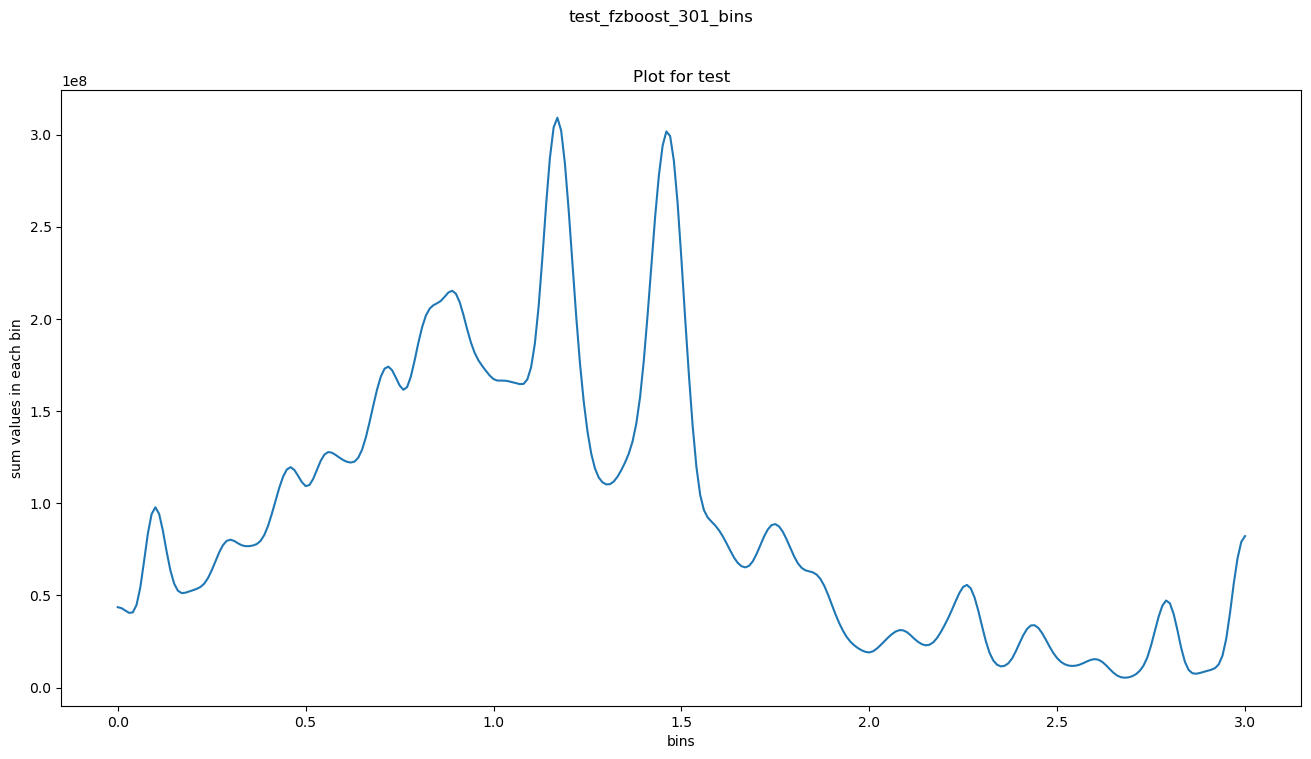

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('~/ic-photoz/Fase3-PCW23/outputs/nz_pdf_stack_test_fzboost_301_bins.csv')
pattern = 'bin_.*'
filtered_df = data.filter(regex=pattern)

data = filtered_df.sum(axis=0)

x_values = np.linspace(0, 3, 301)
y_values = data[:].values

plt.figure(figsize=[16,8])
plt.suptitle("test_fzboost_301_bins")

plt.plot(x_values, y_values)

plt.xlabel('bins')
plt.ylabel('sum values in each bin')
plt.title('Plot for test')

plt.show()